In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import sklearn.cluster as sk_cluster
import sklearn.feature_extraction.text as sk_text
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage      

%matplotlib inline
pd.set_option('display.max_colwidth', -1)

In [2]:
cleaned_data = pd.read_csv('cleaned_data.csv')
clinton_trump_texts = pd.read_table('clinton_trump_user_classes.txt', names = ['UserID', 'Class'], sep='\t')

In [3]:
clinton_trump_texts_agg = cleaned_data.groupby('UserID')['Hash'].apply(" ".join)
clinton_trump_sklearn = pd.DataFrame({'User_id':clinton_trump_texts_agg.index,'All_hashtag':clinton_trump_texts_agg.values})

In [4]:
vectorizer = sk_text.TfidfVectorizer(stop_words='english', min_df=1, max_df=300)
matrix = vectorizer.fit_transform(clinton_trump_sklearn.All_hashtag.values)
tfidf = matrix.toarray()

In [5]:
df = pd.DataFrame(matrix.todense(),index = clinton_trump_texts_agg.index, columns = vectorizer.get_feature_names())

In [6]:
merged_df = pd.merge(df,clinton_trump_texts, on='UserID')

## Task 1.1

### Let’s apply clustering and compare the clustering result against a known ground truth. In the file “clinton_trump_user_classes.txt”, we have the ground truth “class” membership for each user id in the data. Class 0 corresponds to Trump followers, while class 1 corresponds to Clinton followers.

### Run the k-means algorithm (K=2) and the two different variations of the agglomerative clustering algorithm (MAX-based and SSE-based).

### Compute the confusion matrix, precision, recall, and F-measure for (1) k-means, (2) MAX-based agglomerative clustering, and (3) SSE-based agglomerative clustering. Compare their performance and include your conclusions in your report. See sample code in lab 4.

## K-means

In [7]:
%%time
kmeans = sk_cluster.KMeans(n_clusters=2, n_init=10, max_iter=300)
kmeans_label = kmeans.fit_predict(tfidf)

Wall time: 2min 50s


In [8]:
print ('\nPrinting cluster assignment:')
print(kmeans_label)


Printing cluster assignment:
[0 0 0 ... 0 0 0]


In [9]:
print('\n')
error = kmeans.inertia_       #SSE; Sum of squared distances of samples to their closest cluster center.
print ("The total error of the clustering is: ", error)



The total error of the clustering is:  8748.010715393442


In [10]:
truth = np.array(merged_df.Class.values)
truth

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [11]:
confusion = metrics.confusion_matrix(truth, kmeans.labels_, labels=[0, 1])   # first row: 0 ; second row: 1
print(confusion)
print(metrics.precision_score(truth, kmeans.labels_, average='weighted'))
print(metrics.recall_score(truth, kmeans.labels_, average='weighted'))
print(metrics.f1_score(truth, kmeans.labels_, average= 'weighted'))

[[4552   52]
 [4266   51]]
0.5060201738613292
0.5159735455666405
0.36122266140841747


## Agglomerative Clustering

### MAX based

In [12]:
%%time
ag1 = sk_cluster.AgglomerativeClustering(linkage = 'complete', n_clusters = 2) 

Wall time: 1 ms


In [13]:
ag_labels = ag1.fit_predict(tfidf)

In [14]:
print ('\nPrinting cluseter assignment:')
ag_labels


Printing cluseter assignment:


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
confusion = metrics.confusion_matrix(truth, ag1.labels_, labels=[0, 1])   # first row: 0 ; second row: 1
print(confusion)
print(metrics.precision_score(truth, ag1.labels_, average='weighted'))
print(metrics.recall_score(truth, ag1.labels_, average='weighted'))
print(metrics.f1_score(truth, ag1.labels_, average= 'weighted'))

[[4591   13]
 [4308    9]]
0.46421388935974806
0.5156372603968165
0.35294418745440986


### SSE based

In [16]:
ag2 = sk_cluster.AgglomerativeClustering(linkage = 'ward', n_clusters = 2)   

In [17]:
ag_labels2 = ag2.fit_predict(merged_df)

In [18]:
print ('\nPrinting cluseter assignment:')
ag_labels2 


Printing cluseter assignment:


array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [19]:
confusion = metrics.confusion_matrix(truth, ag2.labels_, labels=[0, 1])   # first row: 0 ; second row: 1
print(confusion)
print(metrics.precision_score(truth, ag2.labels_, average='weighted'))
print(metrics.recall_score(truth, ag2.labels_, average='weighted'))
print(metrics.f1_score(truth, ag2.labels_, average= 'weighted'))

[[2220 2384]
 [1291 3026]]
0.5969901995123185
0.5880506669655868
0.583453062904208


## Task 1.2

### For k-means, look at the two centers (centroids) and print the top-30 hashtags/handles with the highest tfidf values.

In [20]:
centroids = kmeans.cluster_centers_
print ('Cluster Centroids')
print(centroids)

Cluster Centroids
[[ 5.54113711e-04  3.80731067e-03  4.77259883e-04 ...  1.28525310e-04
   9.86265119e-05  1.27075799e-04]
 [-3.25260652e-19  2.24496806e-03  2.00684023e-03 ...  1.08420217e-19
  -1.35525272e-19  1.62630326e-19]]


In [21]:
asc_order_centroids = kmeans.cluster_centers_.argsort()    # argsort() returns the indices that would sort an array.
des_order_centroids = asc_order_centroids[:,::-1] 
print(asc_order_centroids)

[[ 1078  7375  8468 ... 13060  1974 10301]
 [ 4544 13999  8130 ...  7946  1974 10246]]


In [22]:
terms = np.array(vectorizer.get_feature_names())
print ("All the terms:")
print(terms, '\n')
x = []
y = []

for i in range(2):
    print ("Cluster:", i)
    for ind in des_order_centroids[i, :30]:
        if (i == 0):
            x.append(terms[ind])
        else:
            y.append(terms[ind])
        print (terms[ind])
    print()  

All the terms:
['039' '0hour1__' '0hour1___' ... 'zulqy77' 'zuma' 'zweber'] 

Cluster: 0
rallytogether
c0nvey
trump2016
lockherup
foxandfriends
mplusplaces
hillarysemail
0hour1__
ebay
hrc
mailonline
maga3x
morning_joe
hillarysemails
frankluntz
tcot
hiac
flythew
lindasuhler
mcuban
amjoyshow
yahoonews
joenbc
gatewaypundit
8217
dineshdsouza
votetrump
noltenc
abcpolitics
strongertogether

Cluster: 1
quote
c0nvey
marketing
socialmedia
leadership
entrepreneur
startup
inspiration
tweetjukebox
wednesdaywisdom
tonyrobbins
linkedin
mlm
scarystoriesin5words
jmteam
success
ff
grantcardone
radiocitizenfm
thankfulthursday
music
onlinelearning
tamelajaeger
carlramallo
podestaemails19
image
taylorswift13
officialjimrohn
life
emabiggestfansjustinbieber



## Task 1.3

### Show the two respective word clouds of the two centers (centroids) by using hashtags/handles and their tfidf values. Hint: Use function fit_words() that comes with wordcloud

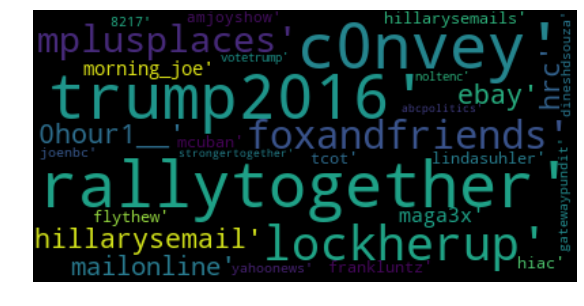

In [23]:
wordcloud = WordCloud().generate(str(x))
plt.figure(figsize=(12,5))
plt.imshow(wordcloud, interpolation='bilinear')  #  bilinear interpolation performs linear interpolation in 2D space. 
plt.axis("off")
plt.show()

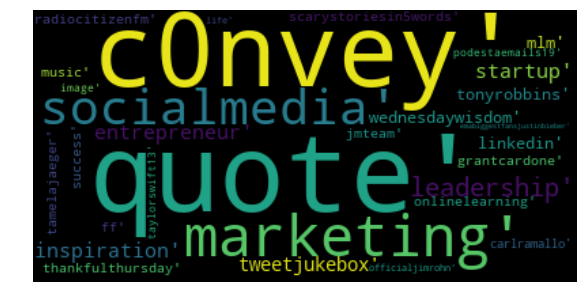

In [24]:
wordcloud = WordCloud().generate(str(y))
plt.figure(figsize=(12,5))
plt.imshow(wordcloud, interpolation='bilinear')  #  bilinear interpolation performs linear interpolation in 2D space. 
plt.axis("off")
plt.show()

# 2. Clustering of Hashtags/handles

## Task 2.1

### First, you apply the k-means algorithm. Create a plot of the SSE error of the k-means algorithm as a function of the number of clusters, for k up to 20, in order to determine the optimal number of clusters.

Text(0, 0.5, 'SSE')

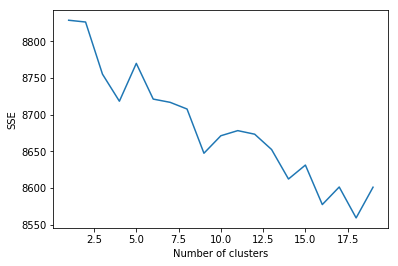

In [25]:
error = np.zeros(20)
for k in range(1,20):
    kmeans = sk_cluster.KMeans(n_clusters=k, n_init=10, max_iter=500)
    kmeans.fit_predict(tfidf.transpose())
    error[k] = kmeans.inertia_

plt.plot(range(1, 20), error[1:])
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

## Task 2.2

### Run the k-means algorithm for the optimal number of clusters you identified in the last task. Print some hashtags/handles in each cluster. From the hashtags/handles in each cluster, try to deduce what is the topic it concerns. Include your conclusions in your report.

In [26]:
kmeans = sk_cluster.KMeans(n_clusters=3, n_init=10, max_iter=300)
kmeans_label = kmeans.fit_predict(tfidf)

In [27]:
print ('\nPrinting cluster assignment:')
print(kmeans_label)


Printing cluster assignment:
[0 0 0 ... 0 0 0]


In [28]:
print('\n')
error = kmeans.inertia_       #SSE; Sum of squared distances of samples to their closest cluster center.
print ("The total error of the clustering is: ", error)



The total error of the clustering is:  8704.369675805992


In [29]:
truth = np.array(merged_df.Class.values)
truth

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [30]:
confusion = metrics.confusion_matrix(truth, kmeans.labels_, labels=[0, 1])   # first row: 0 ; second row: 1
print(confusion)
print("Precision Score: ")
print(metrics.precision_score(truth, kmeans.labels_, average='weighted')) # weighted: the average precision of all clusters is returned
print("Recall Score: ")
print(metrics.recall_score(truth, ag2.labels_, average='weighted'))  # weighted: the average recall of all clusters is returned
print("F1 Score: ")
print(metrics.f1_score(truth, ag2.labels_, average= 'weighted'))     # weighted: the average f1 of all clusters is returned


[[4519   52]
 [4230   51]]
Precision Score: 
0.5061746610343512
Recall Score: 
0.5880506669655868
F1 Score: 
0.583453062904208


In [31]:
asc_order_centroids = kmeans.cluster_centers_.argsort()    # argsort() returns the indices that would sort an array.
des_order_centroids = asc_order_centroids[:,::-1] 
print(asc_order_centroids)

[[ 1078  6354  7375 ...  7624 13060  1974]
 [ 4544 13999  8130 ...  7946  1974 10246]
 [ 4544  5482  5436 ...  2513  2145 10301]]


In [32]:
terms = np.array(vectorizer.get_feature_names())
print ("All the terms:")
print(terms, '\n')

for i in range(3):
    print ("Cluster:", i)
    for ind in des_order_centroids[i, :30]:
        print (terms[ind])
    print() 

All the terms:
['039' '0hour1__' '0hour1___' ... 'zulqy77' 'zuma' 'zweber'] 

Cluster: 0
c0nvey
trump2016
lockherup
foxandfriends
mplusplaces
hillarysemail
0hour1__
ebay
hrc
mailonline
maga3x
hillarysemails
morning_joe
frankluntz
tcot
hiac
flythew
lindasuhler
mcuban
amjoyshow
yahoonews
joenbc
gatewaypundit
8217
dineshdsouza
votetrump
noltenc
abcpolitics
strongertogether
wolfblitzer

Cluster: 1
quote
c0nvey
marketing
socialmedia
leadership
entrepreneur
startup
inspiration
tweetjukebox
wednesdaywisdom
tonyrobbins
linkedin
mlm
scarystoriesin5words
jmteam
success
ff
grantcardone
radiocitizenfm
thankfulthursday
music
onlinelearning
tamelajaeger
carlramallo
podestaemails19
image
taylorswift13
officialjimrohn
life
emabiggestfansjustinbieber

Cluster: 2
rallytogether
cavs
clevelandagainsttheworld
gotribe
browns
defendtheland
mlb
windians
believeland
cle
thejk_kid
buck
ckluber
mlbonfox
sasa2455
rolltribe
tribe
sportsyelling
cleveland19news
cleveland
jordanwalter75
buckeyes
reflog_18
cavsdan
rip